In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
hear = pd.read_excel('hearing_impairment.xlsx')  #набор данных о анализах, имт и болезнях пациентов
hear

,Пол,Возраст,Профессия (должность),Классификация труда,Тяжесть,Нагрев,Шум,Стаж (количество лет),"Аудиометрия (справа) НЧ, дБ","Аудиометрия (справа) ВЧ, дБ","Аудиометрия (слева) НЧ, дБ","Аудиометрия (слева) ВЧ, дБ",Наруш слух,"Глюкоза, ммоль/л","Общий холестерин, ммоль/л","ЛПНП, ммоль/л","ЛПВП, ммоль/л",Индекс атерогенности,Жалобы на боль в анамнезе (ШОП)
0,0,30,токарь,3,1.0,0.0,1.0,15.0,10.0,10,10,10,0,5.19,3.23,1.55,1.06,2.05,0.0
1,1,47,шлифовщик,2,1.0,0.0,1.0,NaN,15.0,15,15,15,0,4.14,4.21,2.83,1.30,2.24,1.0
2,0,26,оператор,1,0.0,0.0,0.0,12.0,10.0,10,10,10,0,NaN,NaN,NaN,NaN,NaN,0.0
3,1,54,машинист,2,0.0,0.0,0.0,NaN,15.0,30,15,30,1,5.08,4.91,3.42,1.17,3.20,0.0
4,1,42,штамповщик,3,0.0,0.0,1.0,10.0,10.0,10,10,10,0,4.82,5.82,3.66,1.09,4.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0,48,такелажник,4,1.0,0.0,1.0,NaN,10.0,20,10,30,1,NaN,NaN,NaN,NaN,NaN,0.0
478,0,52,слесарь,3,NaN,NaN,1.0,30.0,15.0,15,15,15,0,5.19,6.19,4.16,0.94,5.59,0.0
479,0,63,токарь,3,1.0,NaN,1.0,40.0,15.0,40,15,40,1,4.67,4.32,2.80,1.28,2.37,1.0
480,0,50,наладчик,2,1.0,NaN,1.0,NaN,15.0,15,15,15,0,4.85,7.33,3.07,2.04,2.59,0.0


In [3]:
hear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Пол                              482 non-null    int64  
 1   Возраст                          482 non-null    int64  
 2   Профессия (должность)            482 non-null    object 
 3   Классификация труда              482 non-null    int64  
 4   Тяжесть                          440 non-null    float64
 5   Нагрев                           356 non-null    float64
 6   Шум                              451 non-null    float64
 7   Стаж (количество лет)            192 non-null    float64
 8   Аудиометрия (справа) НЧ, дБ      482 non-null    float64
 9   Аудиометрия (справа) ВЧ, дБ      482 non-null    int64  
 10  Аудиометрия (слева) НЧ, дБ       482 non-null    int64  
 11  Аудиометрия (слева) ВЧ, дБ       482 non-null    int64  
 12  Наруш слух            

In [4]:
hear.describe(include = ['O'])

,Профессия (должность)
count,482
unique,62
top,шлифовщик
freq,54


In [5]:

hear['Профессия (должность)'].value_counts()

Профессия (должность)
шлифовщик      54
наладчик       47
токарь         43
слесарь        41
контролер      26
               ..
строгальщик     1
наждачник       1
заточник        1
машинист        1
аппаратчик      1
Name: count, Length: 62, dtype: int64

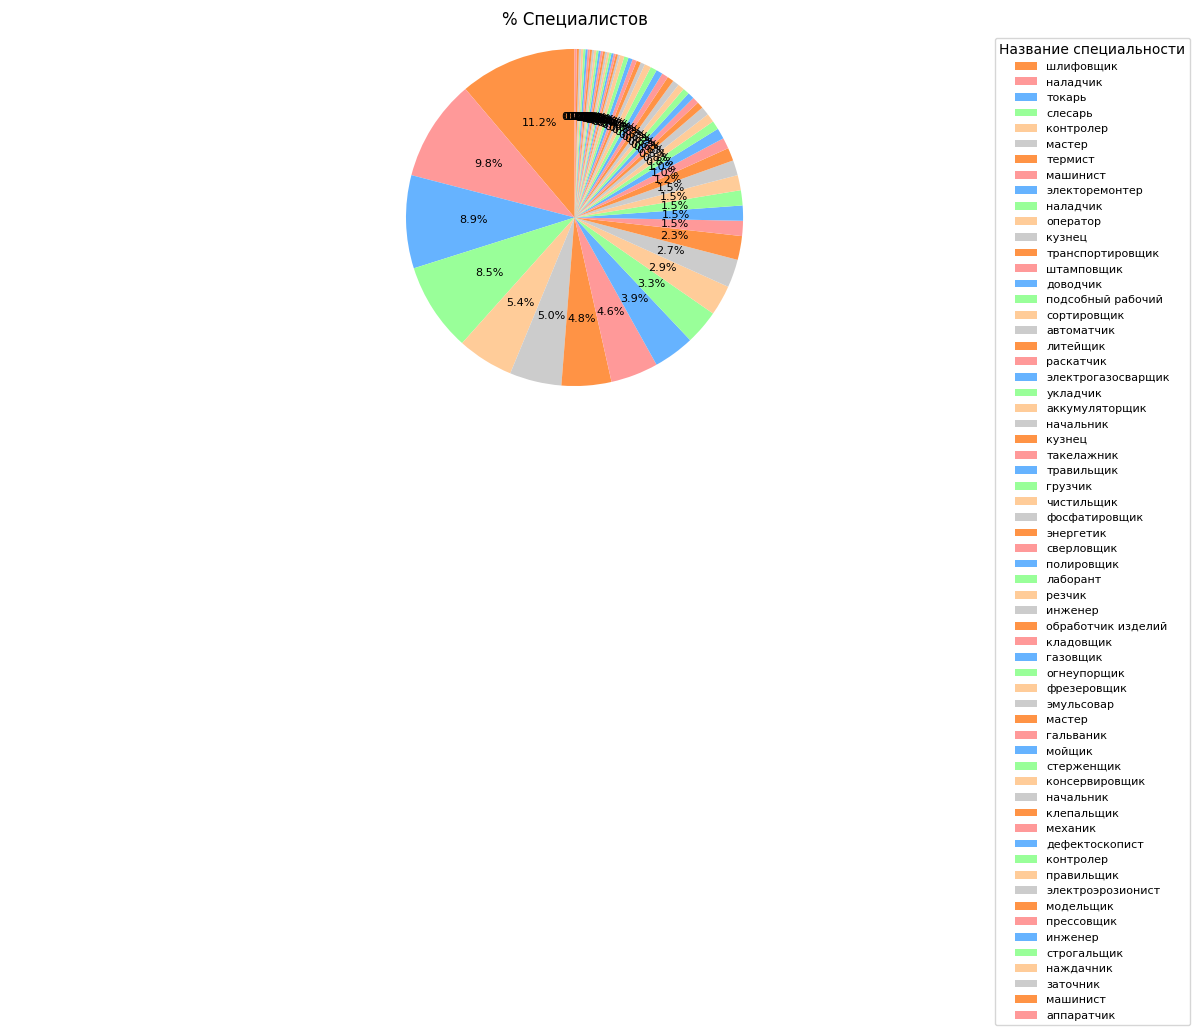

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Подготовка данных
categories = hear['Профессия (должность)'].value_counts().index.tolist()
counts = hear['Профессия (должность)'].value_counts().values.tolist()

# Создание списка цветов
colors = ['#ff9345','#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cccccc']  # Адаптированные цвета для улучшения читаемости

# Создание объекта Figure и Axis
fig, ax = plt.subplots(figsize=(12, 8))

# Построение круговой диаграммы с настройками цветов и позиционирования
wedges, texts, autotexts = ax.pie(counts, colors=colors,
                                 autopct='%1.1f%%', startangle=90,
                                 textprops={'fontsize': 8, 'ha': 'center'})

# Настройка легенды
ax.legend(wedges, categories, title="Название специальности", loc='upper right',
          bbox_to_anchor=(1.05, 1), fontsize=8)

# Настройка общего вида диаграммы
plt.title('% Специалистов', fontsize=12)
plt.axis('equal')
plt.tight_layout()

# Отображение графика
plt.show()

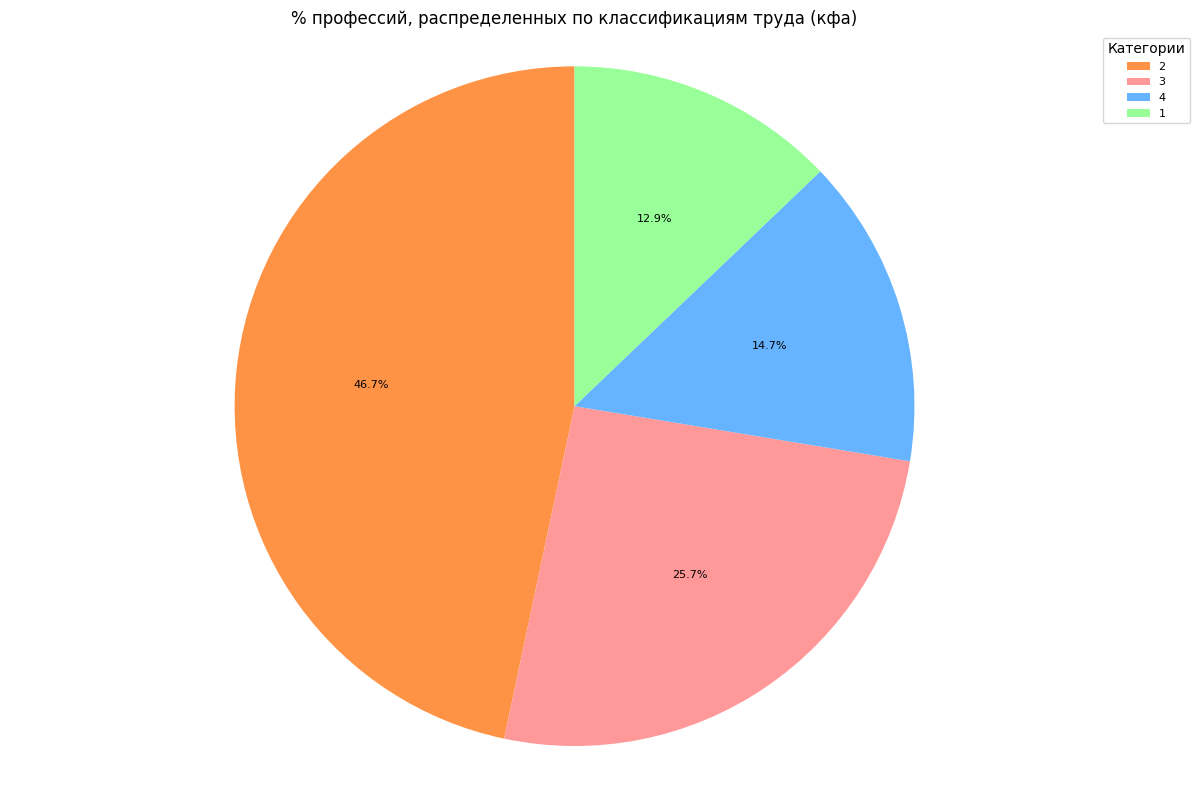

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Подготовка данных
categories = hear['Классификация труда'].value_counts().index.tolist()
counts = hear['Классификация труда'].value_counts().values.tolist()

# Создание списка цветов
colors = ['#ff9345','#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cccccc']  # Адаптированные цвета для улучшения читаемости

# Создание объекта Figure и Axis
fig, ax = plt.subplots(figsize=(12, 8))

# Построение круговой диаграммы с настройками цветов и позиционирования
wedges, texts, autotexts = ax.pie(counts, colors=colors,
                                 autopct='%1.1f%%', startangle=90,
                                 textprops={'fontsize': 8, 'ha': 'center'})

# Настройка легенды
ax.legend(wedges, categories, title="Категории", loc='upper right',
          bbox_to_anchor=(1.05, 1), fontsize=8)

# Настройка общего вида диаграммы
plt.title('% профессий, распределенных по классификациям труда (кфа)', fontsize=12)
plt.axis('equal')
plt.tight_layout()

# Отображение графика
plt.show()

In [3]:
hear_filled = hear.fillna(hear.mean())

TypeError: Could not convert ['токарьшлифовщикоператормашинистштамповщиктермистслесарьэлекторемонтераккумуляторщикконтролерэмульсоваршлифовщикоператорналадчик токарьконтролерконтролермашинистналадчикналадчикфосфатировщиксортировщикштамповщиктокарьаккумуляторщикналадчикгальваникмастермойщиккузнецтокарьтокарьконтролерналадчикналадчиктокарьналадчик операторшлифовщикмастерслесарьналадчикшлифовщиккузнецтокарьшлифовщикэлекторемонтердоводчикконтролермастерслесарьподсобный рабочийтранспортировщикконтролерсменный мастершлифовщикналадчикчистильщикшлифовщиктокарьшлифовщикслесарьналадчик инженеркузнецэлекторемонтертермистшлифовщикшлифовщикмашинистналадчикконтролершлифовщиккузнец грузчикукладчикраскатчикшлифовщикшлифовщикмастер слесарьтермистслесарьналадчикшлифовщикмашинистшлифовщиктокарькузнецналадчик слесарьмастерэлектрогазосварщикстерженщикслесарьшлифовщикналадчик токарьзам. начальника шлифовщикмастермашинистслесарьслесарьслесарьогнеупорщикналадчик машинисттермистмашинистслесарьтермистналадчикфосфатировщиктокарьэлекторемонтертокарьналадчикфосфатировщиклитейщиклитейщиктранспортировщикмашинистдоводчикоператорналадчик наладчикаккумуляторщикукладчикконтролерналадчик шлифовщиктермистналадчикшлифовщикслесарьшлифовщиктравильщиктравильщиктакелажникмашинистшлифовщикрезчикконтролерконтролермашиниставтоматчикаккумуляторщикмастероператоршлифовщиксменный мастершлифовщикконтролер слесарьтокарьшлифовщикоператорслесарьтермистшлифовщиктранспортировщикшлифовщиктокарьдефектоскопистмастертранспортировщиктокарьклепальщикэлекторемонтерконтролерналадчикоператормеханиктокарьналадчикначальник грузчикконтролероператорраскатчикконтролерэлекторемонтерналадчик полировщикслесарьэлектрогазосварщикшлифовщикмашинистшлифовщикконсервировщиксортировщиктермисттокарьналадчикконтролерналадчиктокарьэлекторемонтерслесарьобработчик изделийшлифовщикэлекторемонтершлифовщиктермистналадчик контролерналадчик слесарьправильщикшлифовщикналадчиктермистсортировщиктермистслесарьподсобный рабочиймашинистмастершлифовщикэлектрогазосварщикэлектрогазосварщикшлифовщиктермистэлекторемонтеравтоматчикэлектроэрозионисттокарьналадчиктокарьмашинистшлифовщиккузнецналадчиксменный мастертермистшлифовщикналадчик оператормастертранспортировщиктранспортировщикшлифовщикэнергетикэнергетикштамповщикмашинисттермистналадчикналадчиктокарькузнецналадчик токарьукладчикэлекторемонтершлифовщикраскатчикмашинисттермистраскатчикполировщиклаборанттокарьштамповщикэлекторемонтерсортировщикконтролертокарькузнецслесарьгазовщикналадчикначальникконтролермастерэлекторемонтерэлекторемонтерчистильщикоператорналадчиктокарьналадчикмастертермисттермистсверловщикэлекторемонтерконтролертравильщикмастершлифовщикналадчик термистконтролеррезчикналадчиксверловщикподсобный рабочиймашинистналадчикмашинистналадчикшлифовщикналадчиктранспортировщиктранспортировщикмастермашинисттранспортировщикраскатчиклитейщикштамповщиккладовщикналадчиксортировщиктокарьшлифовщикэлекторемонтеравтоматчикслесарьогнеупорщикмодельщиктокарьсортировщикпрессовщик доводчикгрузчикшлифовщикналадчикподсобный рабочийэлекторемонтерэлекторемонтершлифовщикмашинистсменный мастертокарьшлифовщикмашинистлитейщикконтролеркузнецмастергазовщиктокарьтокарьслесарьстрогальщикслесарьконтролерэлекторемонтертокарьналадчикслесарьинженер слесарьоператорслесарьзам. начальникатокарьподсобный рабочийконтролерполировщиктермисткузнец автоматчиктранспортировщикслесарьслесарьобработчик изделийдоводчиктокарьдоводчикшлифовщикшлифовщикналадчикшлифовщикслесарьналадчикшлифовщикналадчиккузнецмашинистлитейщиктокарьмастермастерэлекторемонтертокарькузнецрезчиклаборантшлифовщикконтролершлифовщиклитейщикслесарьтокарьсортировщикавтоматчиктермисттермистдоводчиккузнецнаждачникшлифовщиктокарьтранспортировщикслесарьинженерслесарьподсобный рабочийналадчикшлифовщикналадчик токарьдоводчикоператоршлифовщиктермистналадчиктакелажникзаточниктермистфрезеровщикслесарьмашинист кузнецслесарьоператороператормастеравтоматчиктокарьслесарькузнец наладчикэлектрогазосварщикаппаратчикналадчикмастеравтоматчикналадчикНаладчикфрезеровщикштамповщикслесарьукладчикшлифовщиккладовщикчистильщикналадчикэнергетикналадчикконтролерслесарьконтролерслесарьмастерналадчикподсобный рабочийшлифовщикслесарьмашинистмастеркузнецналадчиктокарьштамповщиктокарьсверловщикслесарьналадчик лаборанттокарьконтролерначальниктакелажникслесарьтокарьналадчикналадчик'] to numeric